## [KoNLPy](https://konlpy.org/ko/v0.5.2/api/konlpy.tag/) 


### Step 1. 형태소 분석기 변경해 보기

한국어 자연어 처리에 성능에 영향을 주는 또 다른 요소는 사용하는 형태소 분석기의 종류입니다. 앞서 진행한 프로젝트에서는 Mecab을 사용했었습니다. 하지만 이번에 설치한 konlpy 패키지 안에는 Mecab 이외에도 Hannanum, Kkma, Komoran, Okt라는 형태소분석기가 존재합니다. 이들 형태소 분석기 중 어떤 것을 선택하는 것이 좋을지, 형태소 분석기간의 장단점은 무엇인지, 처리 속도와 성능에는 어떤 변화가 있는지 비교해 보세요.

In [23]:
import os
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family="NanumGothic")

In [2]:
csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data2.csv"
df = pd.read_table(csv_path, sep=',')
df

,news,code
0,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,경제
1,▶제21대 총선 실시간 개표 현황 및 결과 보기\n\n총선에서 여당이 다시 한 번 ...,경제
2,[뉴욕=AP/뉴시스]지난 10일 뉴욕 증권거래소 건물에 미국 국기가 게양되어 있다....,경제
3,"부산지역 주유소에서 판매하는 기름값이 휘발유는 평균 1200원대, 경유는 1000원...",경제
4,담배업계가 소비자의 취향을 저격한 다양한 담배 신제품들을 잇달아 선보이고 있다.이전...,경제
...,...,...
3698,레고켐바이오사이언스(대표 김용주·사진)가 글로벌 기술수출에 또다시 성공했다. 201...,IT/과학
3699,제21대 국회의원선거 기간 중단됐던 네이버 실시간 급상승 검색어 서비스가 15일 오...,IT/과학
3700,아마존 [AFP=연합뉴스 자료사진] 아마존 [AFP=연합뉴스 자료사진]\n\n직원들...,IT/과학
3701,"제21대 국회의원선거가 임박한 가운데, 투표 및 개표 방송을 준비하는 기업들의 움직...",IT/과학


In [33]:
# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거합니다.
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']

'뉴욕뉴시스지난 일 뉴욕 증권거래소 건물에 미국 국기가 게양되어 있다 신종 코로나바이러스 감염증코로나에 따른 봉쇄 조치들이 미국 경제에 얼마나 큰 타격을 주고 있는지에 대한 더 많은 징후들이 나타나면서 일 월가의 주가는 크게 하락 출발했다  뉴욕뉴시스지난 일 뉴욕 증권거래소 건물에 미국 국기가 게양되어 있다 신종 코로나바이러스 감염증코로나에 따른 봉쇄 조치들이 미국 경제에 얼마나 큰 타격을 주고 있는지에 대한 더 많은 징후들이 나타나면서 일 월가의 주가는 크게 하락 출발했다 뉴욕뉴시스 유세진 기자  신종 코로나바이러스 감염증코로나에 따른 봉쇄 조치들이 미국 경제에 얼마나 큰 타격을 주고 있는지에 대한 더 많은 징후들이 나타나면서 일 월가의 주가는 크게 하락 출발했다일 미국 주요 주가 지수는 거래 시작 몇분만에  넘게 하락했고 투자자들이 안전자산에 몰리면서 채권 가격은 상승했다코로나 확산으로 미 전역에서 상업 거래가 거의 전면 중단됨에 따라 지난달 소매판매는 전례 없이 나 급감했다뉴욕주 제조업 지수는 사상 최저 수준으로 곤두박질쳤고 한 글로벌 에너지기관은 올해 전 세계 석유 수요가 사상 최대 폭으로 감소할 것으로 전망했다 공감언론 뉴시스 '

In [6]:
print(df.isnull().sum())

news    0
code    0
dtype: int64


In [7]:
# 중복된 샘플들을 제거합니다.
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  2137


In [8]:
# 중복 샘플 제거
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  2137


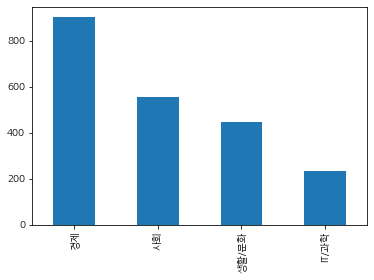

In [9]:
df['code'].value_counts().plot(kind = 'bar')

In [10]:
print(df.groupby('code').size().reset_index(name = 'count'))

    code  count
0  IT/과학    235
1     경제    902
2     사회    554
3  생활/문화    446


## Hannanum 분석기 

In [15]:
from konlpy.tag import Hannanum

In [16]:
hannanum = Hannanum()

In [5]:
kor_text = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'

In [18]:
#- 형태소 분석, 즉 토큰화(tokenization)를 합니다.
print(hannanum.morphs(kor_text))

['밤', '에', '귀가', '하', '던', '여성', '에게', '범죄', '를', '시도', '하', 'ㄴ', '대', '남성', '이', '구속됐다서울', '제주경찰', '서는', '상하', '어', '혐의', '로', '씨', '를', '구속해', '수사', '하고', '있', '다', '고', '일', '밝혔다씨', '는', '지난달', '일', '피하', '어', '여성', '을', '인근', '지하철', '역', '에서부터', '따르', '아', '가', '아', '폭행', '을', '시도', '하', '려', '다가', '도망가', 'ㄴ', '혐의', '를', '받는다피해', '여성', '이', '저항', '하', '자', '놀라', 'ㄴ', '씨', '는', '도망가', '아며', '신고', '를', '받', '고', '주변', '을', '수색', '하', '던', '경찰', '에', '체포됐다피해', '여성', '은', '이', '과정', '에서', '경미한', '부상', '을', '입', '은', '것', '으로', '전하', '어', '지', '었다']


### 불용어 

In [9]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스' ,'는', '를', '은', '에서', 'ㄴ', '로', '에게','어', '이', '으로', '하', 'ㄹ']

In [22]:
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수입니다.
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = hannanum.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

In [23]:
text_data = preprocessing(df['news'])
print(text_data[0])

기사 섹션 분류 안내기사 섹션 정보 해당 언론사 분류 따르 고 습니다 언론사 개별 기사 개 이상 섹션 으로 중복 분류 ㄹ 있습니다닫기


### 머신 러닝 사용하기

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

### test data / train data

In [25]:
#- 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

#### 각 뉴스 문서를 TF-IDF 벡터로 바꾸고, 이를 통해 나이브 베이즈 분류기를 학습

In [26]:
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

### Hannanum TEST

- 텍스트를 입력하면 자동으로 TF-IDF 벡터로 바꾸는 전처리 함수
- 이 함수를 통해서 텍스트를 바로 나이브 베이즈 분류기의 입력으로 사용함으로써 보다 용이하게 테스트를 할 수 있습니다.

In [28]:
def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

In [36]:
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['경제']


In [37]:
new_sent = preprocessing(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))

['경제']


In [38]:
new_sent = preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['경제']


### Hannanum 분류기 

- 여기에서 부터 문제이다. 카데고리 분류가 안되고 있다. 
- 모든 뉴스 섹션을 경제로 분류하고 있다. 

## Hannanum predict

In [41]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.00      0.00      0.00        59
          경제       0.61      0.98      0.75       233
          사회       0.92      0.92      0.92       132
       생활/문화       0.97      0.25      0.40       111

    accuracy                           0.71       535
   macro avg       0.62      0.54      0.52       535
weighted avg       0.69      0.71      0.64       535



/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Kkma 분석기

In [15]:
from konlpy.tag import Kkma
kkma = Kkma()

#- 형태소 분석, 즉 토큰화(tokenization)를 합니다.
print(kkma.morphs(kor_text))

['밤', '에', '귀가', '하', '더', 'ㄴ', '여성', '에게', '범죄', '를', '시도', '하', 'ㄴ', '대', '남성', '이', '구속', '되', '었', '다', '서울', '제주', '경찰서', '는', '상해', '혐의', '로', '씨', '를', '구속', '하', '어', '수사', '하', '고', '있', '다고', '일', '밝히', '었', '다', '씨', '는', '지난달', '일', '피해', '여성', '을', '인근', '지하철', '역', '에서', '부터', '따라가', '폭행을', '시도', '하', '려', '다그', '아', '도망가', 'ㄴ', '혐의', '를', '받', '는', '다', '피해', '여성', '이', '저항', '하', '자', '놀라', 'ㄴ', '씨', '는', '도망가', '었', '으며', '신고', '를', '받', '고', '주변', '을', '수색', '하', '더', 'ㄴ', '경찰', '에', '체포', '되', '었', '다', '피해', '여성', '은', '이', '과정', '에서', '경미', '하', 'ㄴ', '부상', '을', '입', '은', '것', '으로', '전하', '어', '지', '었', '다']


In [45]:
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수입니다.
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = kkma.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

In [46]:
text_data = preprocessing(df['news'])
print(text_data[0])

기사 섹션 분류 안내 기사 섹션 정보 해당 언론사 분류 따르 고 습니다 언론사 개별 기사 개 이상 섹션 중복 분류 ㄹ 습니다 닫기


In [48]:
#- 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

In [58]:
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [59]:
# 텍스트를 입력하면 자동으로 TF-IDF 벡터로 바꾸는 전처리 함수
def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

In [60]:
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['경제']


In [61]:
new_sent = preprocessing(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))

['생활/문화']


In [62]:
new_sent = preprocessing(["가상자산 거래소 한빗코는 다우존스 리스크 앤 컴플라이언스 솔루션(사진)을 도입해 가상자산 거래 관련 자금세탁방지(AML)와 고객신원확인(KYC)을 강화하겠다고 15일 밝혔다.내년 3월 가상자산 사업자 인허가제 관련 특정 금융거래정보의 보고 및 이용 등에 관한 법률(특금법) 시행을 앞두고 가상자산 AML 강화에 나선 것이다.시중은행이 이용하는 '다우존스 리스크 앤 컴플라이언스'는 국제연합(UN), 유럽연합(EU), 미국 재무부 해외재산통제국(OFAC) 등 국제기구와 각국 정부 등으로부터 1600개 이상의 국제 제재 명단을 수집해 관리하는 것으로 전해졌다.이에 따라 한빗코는 전 세계 200여 개국에서 8시간마다 업데이트되는 거래 제재 명단에 오른 개인이나 법인에 대해서는 회원가입과 이용 등을 거절할 예정이다.한국블록체인협회 거래소 운영위원장인 김성아 한빗코 대표는 FATF 권고에 따라 내년 3월 가상자산 AML 관련 법안이 시행되는 것에 맞춰 다우존스와 협업을 결정했다며 앞으로도 금융권 수준의 AML 솔루션을 도입해 강력한 보안체계를 갖춘 거래소 시스템을 구축하겠다고 말했다"])
print(clf.predict(tfidf_vectorizer(new_sent)))

['경제']


- IT 관련 기사인데 경제로 잘못 예측

In [63]:
new_sent = preprocessing(["15일 오후 6시 48분께 울산시 동구 서부동 염포산에서 난 산불이 진화됐다.불이 나자 산림당국과 소방당국은 소방관과 공무원 등 500여 명, 소방차 11대, 진화 차량 6대 등을 동원해 3시간 10여분 만에 주불을 잡았다.애초 산 중턱에서 불이 시작돼 차량 진입이 어렵고, 헬기도 투입이 어려워 진화에 어려움이 있었으나 출동한 소방당국에 의해 모두 진화됐다. 주민 대피도 해제됐다.불은 산림 0.5㏊가량을 태웠다.소방당국은 뒷불 감시와 함께 날이 밝으면 헬기 등을 투입해 마무리할 예정이다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['사회']


In [64]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.00      0.00      0.00        59
          경제       0.63      0.98      0.77       233
          사회       0.92      0.93      0.92       132
       생활/문화       0.95      0.35      0.51       111

    accuracy                           0.73       535
   macro avg       0.63      0.57      0.55       535
weighted avg       0.70      0.73      0.67       535



/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## komoran

In [38]:
import jpype  # komoran 분류기에는 필요함 
from PyKomoran import *
from konlpy.tag import Komoran

In [39]:
Komoran = Komoran()

print(Komoran.morphs(kor_text))

['밤', '에', '귀가', '하', '던', '여성', '에게', '범죄', '를', '시도', '하', 'ㄴ', '대', '남성', '이', '구속', '되', '었', '다', '서울', '제주', '경찰서', '는', '상해', '혐의', '로', '씨', '를', '구속', '하', '아', '수사', '하', '고', '있', '다고', '일', '밝히', '었', '다', '씨', '는', '지난달', '일', '피해', '여성', '을', '인근', '지하철', '역', '에서부터', '따라가', '아', '폭행', '을', '시도', '하', '려다가', '도망가', 'ㄴ', '혐의', '를', '받', '는다', '피하', '아', '여성', '이', '저항', '하', '자', '놀라', 'ㄴ', '씨', '는', '도망가', '았', '으며', '신고', '를', '받', '고', '주변', '을', '수색', '하', '던', '경찰', '에', '체포', '되', '었', '다', '피하', '아', '여성', '은', '이', '과정', '에서', '경미', '하', 'ㄴ', '부상', '을', '입', '은', '것', '으로', '전하', '아', '지', '었', '다']


### 불용어 제거 

In [40]:
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수입니다.
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = Komoran.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

In [41]:
text_data = preprocessing(df['news'])
print(text_data[0])

기사 섹션 분류 안내 기사 섹션 정보 해당 언론사 분류 따르 고 습니다 . 언론사 개별 기사 2 개 이상 섹션 중복 분류 습니다 . 닫 기


### test/ train data 분류하기 

In [42]:
#- 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

###  TF-IDF 벡터로 바꾸고, 이를 통해 나이브 베이즈 분류기를 학습

In [43]:
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [44]:
def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

In [45]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.94      0.82      0.87       213
          경제       0.78      0.86      0.82       263
          사회       0.81      0.96      0.88       242
       생활/문화       0.93      0.72      0.81       208

    accuracy                           0.85       926
   macro avg       0.86      0.84      0.84       926
weighted avg       0.86      0.85      0.84       926



## Okt  분류기

In [18]:
from konlpy.tag import Okt
okt = Okt()

In [19]:
#- 형태소 분석, 즉 토큰화(tokenization)를 합니다.
print(okt.morphs(kor_text))

['밤', '에', '귀가', '하던', '여성', '에게', '범죄', '를', '시도', '한', '대', '남성', '이', '구속', '됐다', '서울', '제', '주', '경찰서', '는', '상해', '혐의', '로', '씨', '를', '구속', '해', '수사', '하고', '있다고', '일', '밝혔다', '씨', '는', '지난달', '일', '피해', '여성', '을', '인근', '지하철', '역', '에서부터', '따라가', '폭행', '을', '시도', '하려다가', '도망간', '혐의', '를', '받는다', '피해', '여성', '이', '저항', '하자', '놀란', '씨', '는', '도망갔으며', '신고', '를', '받고', '주변', '을', '수색', '하던', '경찰', '에', '체포', '됐다', '피해', '여성', '은', '이', '과정', '에서', '경미한', '부상', '을', '입은', '것', '으로', '전해졌다']


### Okt 불용어 제거 

In [20]:
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수입니다.
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = okt.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

In [21]:
text_data = preprocessing(df['news'])
print(text_data[0])

기사 섹션 분류 안내 

 기사 섹션 정보 해당 언론사 분류 따르고 있습니다 . 언론사 개별 기사 2 개 이상 섹션 중복 분류 있습니다 . 

 닫기


### text_data  / test, train 분리하기 

In [25]:
#- 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

### 뉴스 문서를 TF-IDF 벡터로 바꾸고, 나이브 베이즈 분류기 학습

In [26]:
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

### Okt 분류기 test

In [27]:
def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

In [28]:
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['경제']


- 사회영역 기사인데 경제로 잘못 분류 

In [29]:
new_sent = preprocessing(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))

['생활/문화']


- 생활 /문화 영역 기사로 잘 분류 

In [ ]:
new_sent = preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

- IT/과확 기사로 잘 분류 

In [31]:
new_sent = preprocessing(["가상자산 거래소 한빗코는 다우존스 리스크 앤 컴플라이언스 솔루션(사진)을 도입해 가상자산 거래 관련 자금세탁방지(AML)와 고객신원확인(KYC)을 강화하겠다고 15일 밝혔다.내년 3월 가상자산 사업자 인허가제 관련 특정 금융거래정보의 보고 및 이용 등에 관한 법률(특금법) 시행을 앞두고 가상자산 AML 강화에 나선 것이다.시중은행이 이용하는 '다우존스 리스크 앤 컴플라이언스'는 국제연합(UN), 유럽연합(EU), 미국 재무부 해외재산통제국(OFAC) 등 국제기구와 각국 정부 등으로부터 1600개 이상의 국제 제재 명단을 수집해 관리하는 것으로 전해졌다.이에 따라 한빗코는 전 세계 200여 개국에서 8시간마다 업데이트되는 거래 제재 명단에 오른 개인이나 법인에 대해서는 회원가입과 이용 등을 거절할 예정이다.한국블록체인협회 거래소 운영위원장인 김성아 한빗코 대표는 FATF 권고에 따라 내년 3월 가상자산 AML 관련 법안이 시행되는 것에 맞춰 다우존스와 협업을 결정했다며 앞으로도 금융권 수준의 AML 솔루션을 도입해 강력한 보안체계를 갖춘 거래소 시스템을 구축하겠다고 말했다"])
print(clf.predict(tfidf_vectorizer(new_sent)))

['IT/과학']


### Okt 분류기 평가 

In [33]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.94      0.82      0.87       213
          경제       0.77      0.87      0.82       263
          사회       0.81      0.96      0.88       242
       생활/문화       0.93      0.70      0.80       208

    accuracy                           0.84       926
   macro avg       0.86      0.84      0.84       926
weighted avg       0.85      0.84      0.84       926

